In [2]:
%matplotlib inline

import pandas as pd
import pathlib

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns

from sky_spot.utils import ClusterType

plt.rc('font', size=16)

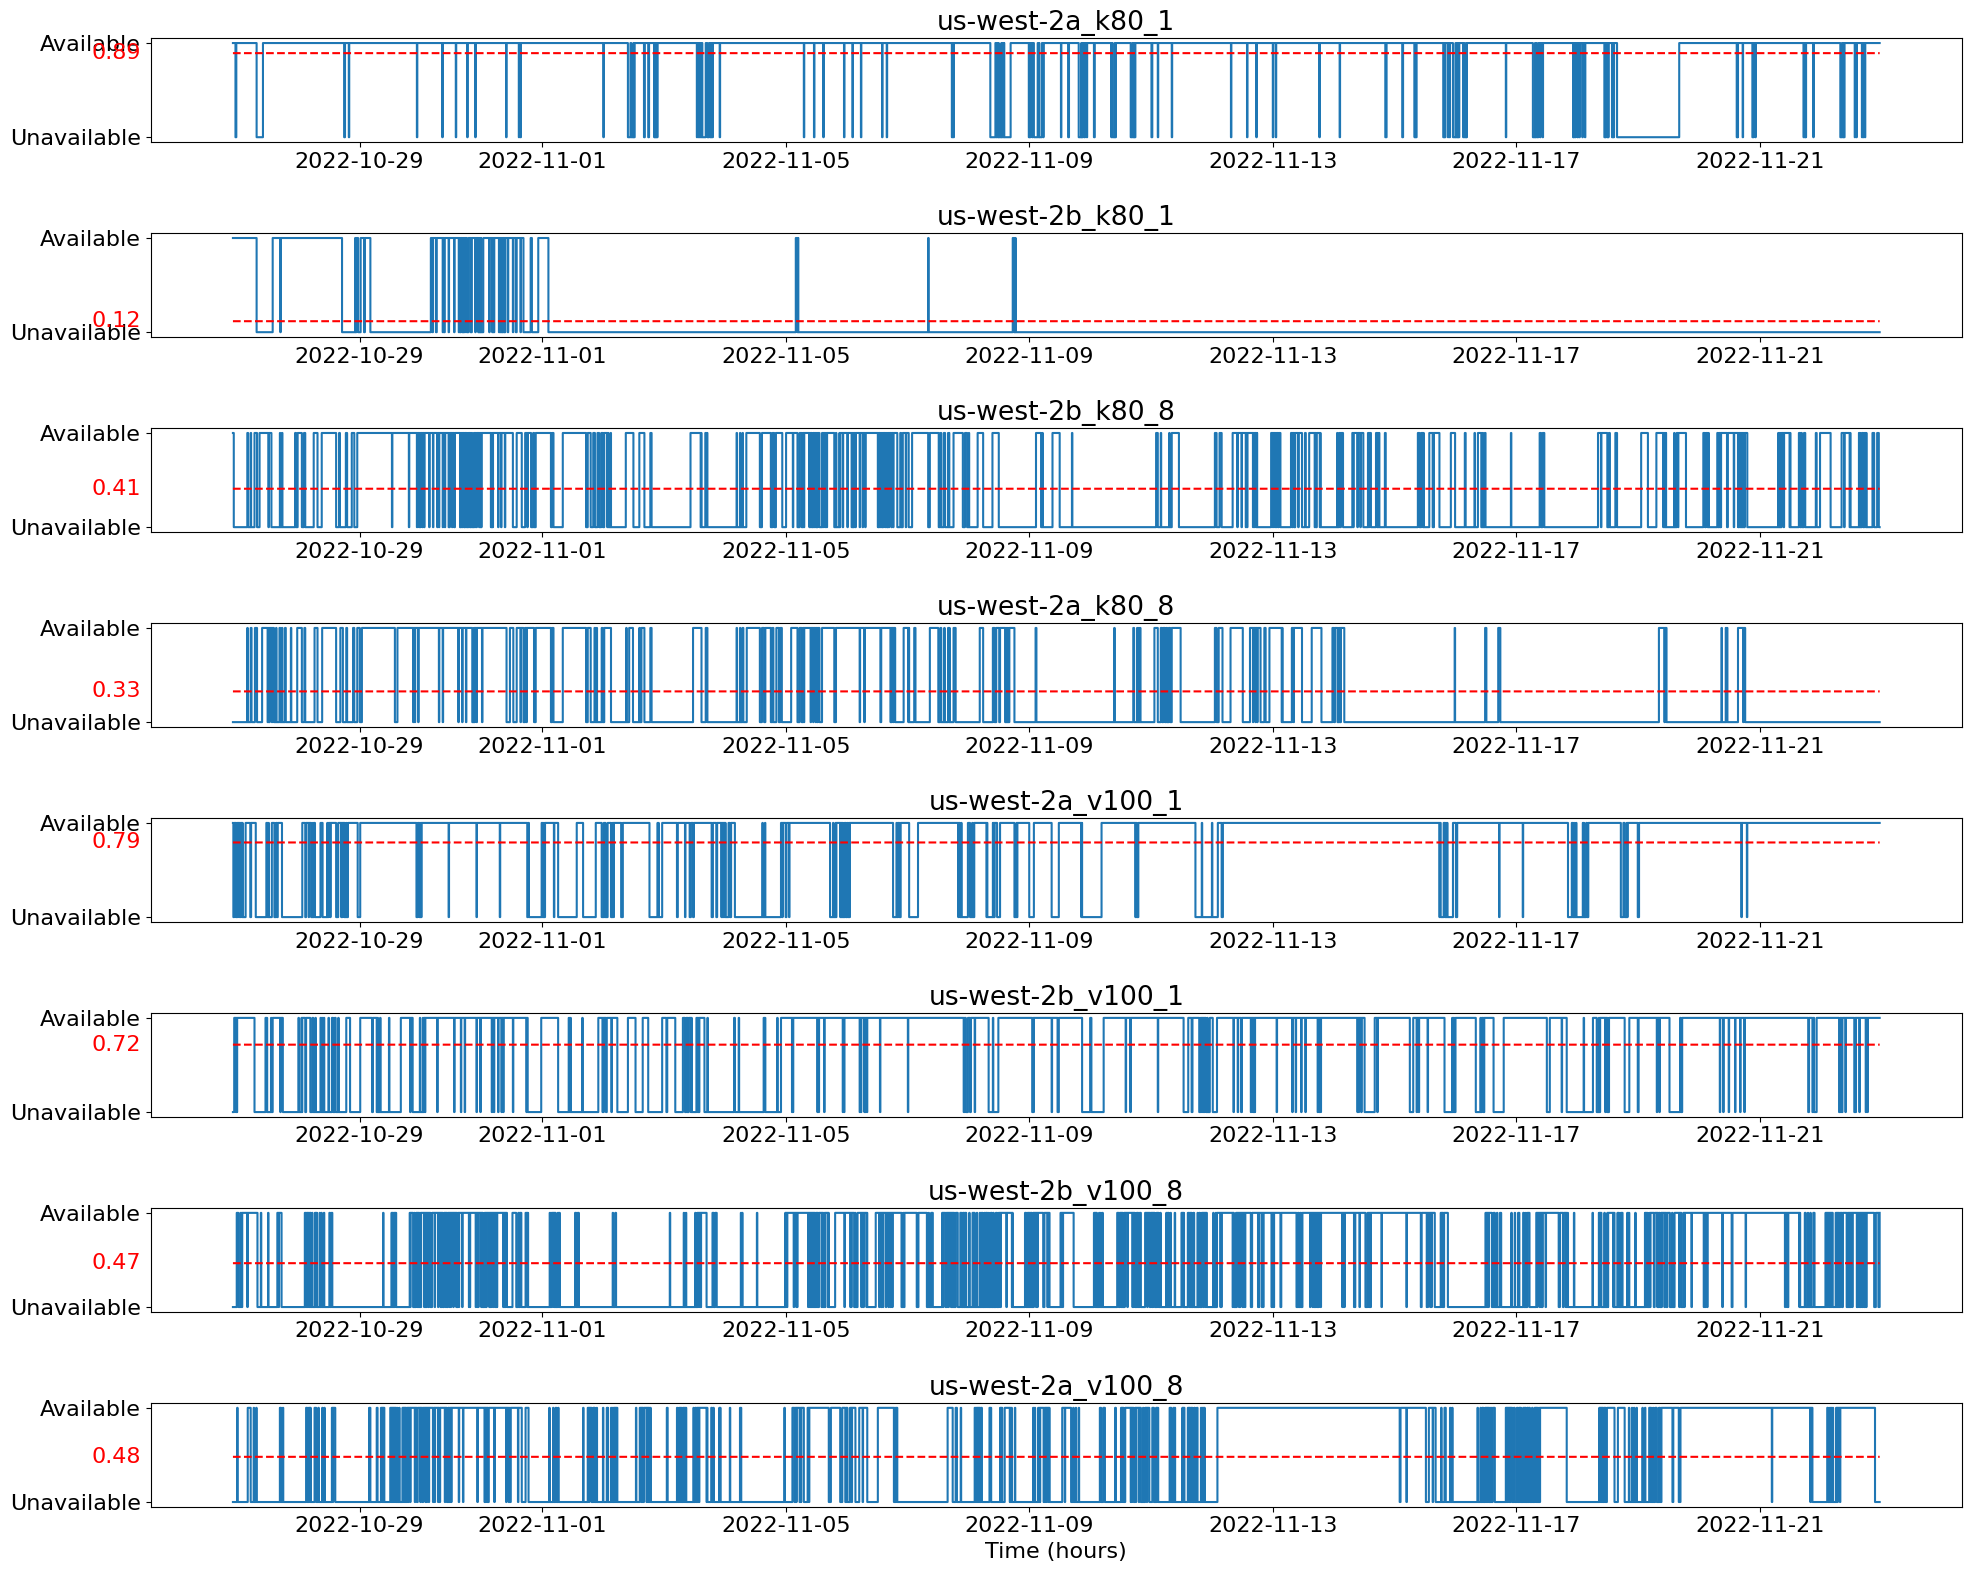

In [2]:
TRACE = 'traces/2022-10-26T22-05'

trace_path = pathlib.Path(TRACE).expanduser().absolute()
traces = {}
if trace_path.is_file():
    traces = {trace_path.stem: pd.read_csv(trace_path)}
else:
    for path in trace_path.glob('*.txt'):
        trace = pd.read_csv(path, names=['index', 'time', 'preempted'])
        traces[path.stem] = trace


fig, axes = plt.subplots(nrows=len(traces), ncols=1, figsize=(20, 2 * len(traces)))
sorted_traces = sorted(traces.items(), key=lambda x: x[0].partition('_')[-1])
for i, (trace_name, trace) in enumerate(sorted_traces):
    sns.lineplot(x=pd.to_datetime(trace['time'], format='%Y-%m-%dT%H:%M:%S.000Z'), y=1-trace['preempted'], ax=axes[i], drawstyle='steps-post')
    mean = (1 - trace['preempted']).mean()
    sns.lineplot(x=pd.to_datetime(trace['time'], format='%Y-%m-%dT%H:%M:%S.000Z'), y=mean, color='red', linestyle='--', ax=axes[i])
    trans = transforms.blended_transform_factory(
    axes[i].get_yticklabels()[0].get_transform(), axes[i].transData)
    axes[i].text(0, mean, "{:.2f}".format(mean), color="red", transform=trans, 
        ha="right", va="center")
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].set_title(trace_name)
    axes[i].set_yticks([0, 1])
    # axes[i].set_yticklabels(['Available', 'Unavailable'])
    axes[i].set_yticklabels(['Unavailable', 'Available'])

axes[i].set_xlabel('Time (hours)')
fig.tight_layout(h_pad=1.5)


6 	 0.7925878320479862 	 0.35594942828685866
12 	 0.7925248884311706 	 0.3343848447625507
18 	 0.7924617500429775 	 0.31931080081606716
24 	 0.7924091769972452 	 0.3067348460027381
30 	 0.7924642179686153 	 0.2957581438111676
36 	 0.7925446171560161 	 0.2858929279632145
42 	 0.7925099463760594 	 0.2771833636461011
48 	 0.7924625346500346 	 0.26946442092690626
54 	 0.79235833959936 	 0.2624875399985281
60 	 0.7922749391727494 	 0.2562186004351819
66 	 0.7922897381121924 	 0.2506300722638965
72 	 0.7923785448628545 	 0.24559741334536572
78 	 0.792524613504184 	 0.24096207883009524
84 	 0.7926878778793783 	 0.23663687808940487
90 	 0.7928504700181002 	 0.23252557289779804
96 	 0.7930317982456141 	 0.22855256543098487
102 	 0.7931770494175531 	 0.2247904480370483
108 	 0.7933263913332551 	 0.22113690490332916
114 	 0.7934421590729864 	 0.2176133874873286
120 	 0.7935271009887005 	 0.21424752377428768
126 	 0.7936423729527178 	 0.21098315917529606
132 	 0.7937900524909027 	 0.20782841086893

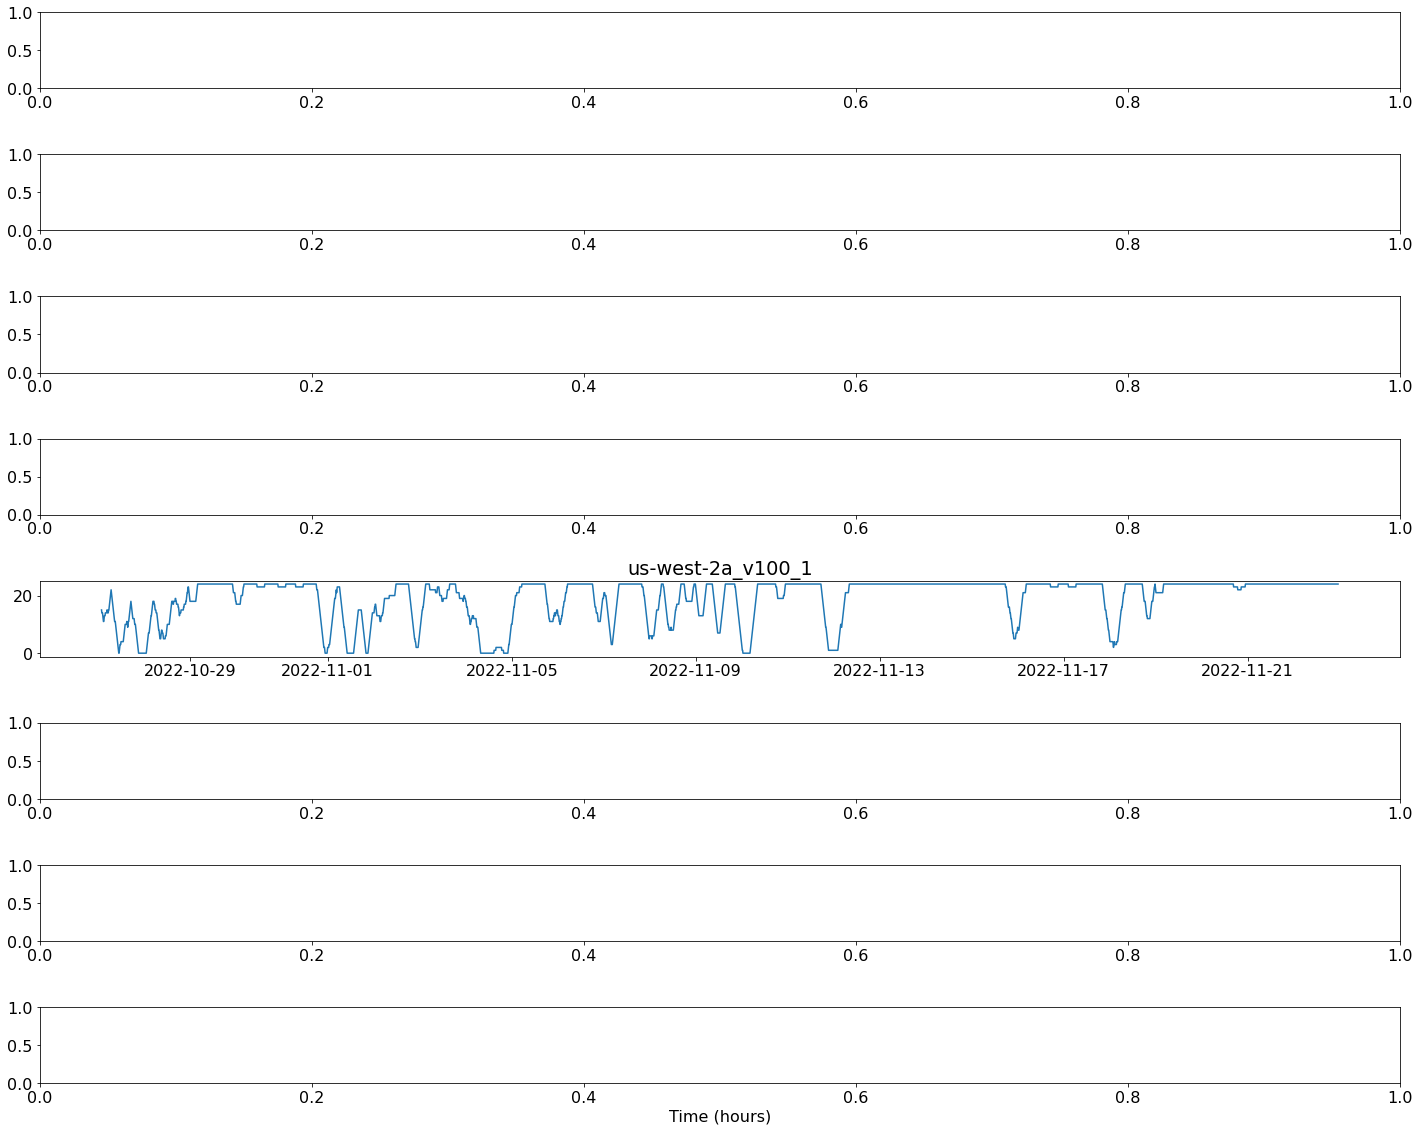

In [6]:
TRACE = 'traces/2022-10-26T22-05'

trace_path = pathlib.Path(TRACE).expanduser().absolute()
traces = {}
if trace_path.is_file():
    traces = {trace_path.stem: pd.read_csv(trace_path)}
else:
    for path in trace_path.glob('*.txt'):
        trace = pd.read_csv(path, names=['index', 'time', 'preempted'])
        # trace = trace.iloc[int(0.5 * len(trace)):]
        traces[path.stem] = trace


fig, axes = plt.subplots(nrows=len(traces), ncols=1, figsize=(20, 2 * len(traces)))
sorted_traces = sorted(traces.items(), key=lambda x: x[0].partition('_')[-1])
for i, (trace_name, trace) in enumerate(sorted_traces):
    if trace_name != 'us-west-2a_v100_1':
        continue
    for rolling_size in range(6, 313, 6):
        rolling = (1-trace['preempted']).rolling(rolling_size).mean()
        print(rolling_size, '\t', rolling.mean(), '\t', rolling.std())
    ax = axes[i]
    sns.lineplot(x=pd.to_datetime(trace['time'], format='%Y-%m-%dT%H:%M:%S.000Z'), y=(1-trace['preempted']).rolling(24).sum(), ax=ax)
    # mean = (1-trace['preempted']).mean()
    # sns.lineplot(x=pd.to_datetime(trace['time'], format='%Y-%m-%dT%H:%M:%S.000Z'), y=mean, color='red', linestyle='--', ax=ax)
    # trans = transforms.blended_transform_factory(
    # ax.get_yticklabels()[0].get_transform(), ax.transData)
    # ax.text(0, mean, "{:.3f}".format(mean), color="red", transform=trans, 
    #     ha="right", va="center")
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(trace_name)

axes[i].set_xlabel('Time (hours)')
fig.tight_layout(h_pad=1.5)


## Fit traces

24.49206349206349 6.412698412698413


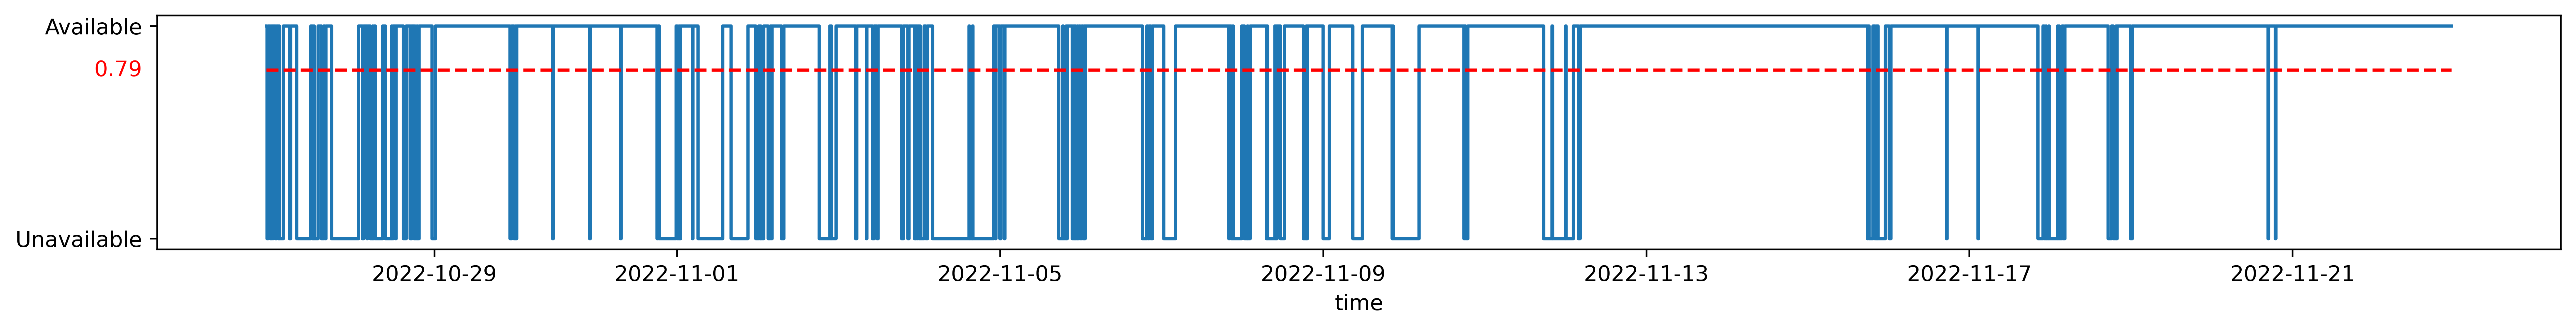

In [19]:
import pandas as pd
import pathlib
TRACE = 'traces/2022-10-26T22-05/us-west-2a_v100_1.txt'
# TRACE = 'traces/2022-10-26T22-05/us-west-2a_v100_8.txt'
# TRACE = 'traces/2022-10-26T22-05/us-west-2b_v100_1.txt'
# TRACE = 'traces/2022-10-26T22-05/us-west-2a_k80_1.txt'
# TRACE = 'traces/2022-10-26T22-05/us-west-2b_k80_1.txt'

trace_path = pathlib.Path(TRACE).expanduser().absolute()
avail_traces_month = {}
avail_traces_month = pd.read_csv(trace_path, names=['index', 'time', 'preempted'])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 2), dpi=500)
sns.lineplot(x=pd.to_datetime(avail_traces_month['time']), y=1-avail_traces_month['preempted'], drawstyle='steps-post', ax=ax)

mean = (1 - avail_traces_month['preempted']).mean()
sns.lineplot(x=pd.to_datetime(avail_traces_month['time'], format='%Y-%m-%dT%H:%M:%S.000Z'), y=mean, color='red', linestyle='--', ax=ax)
trans = transforms.blended_transform_factory(
ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0, mean, "{:.2f}".format(mean), color="red", transform=trans, 
    ha="right", va="center")

ax.set_yticks([0, 1])
# axes[i].set_yticklabels(['Available', 'Unavailable'])
ax.set_yticklabels(['Unavailable', 'Available'])
ax.set_ylabel('')
# l = len(avail_traces_month['time'])
# groups = 4
# for i in range(1, groups):
#     plt.axvline(pd.to_datetime(avail_traces_month['time'].iloc[l*i//4]), color='red', linestyle='--', linewidth=4)


life_groups = avail_traces_month['preempted'].cumsum()
life_counts = life_groups.groupby(life_groups).count() - 1

life_hours = life_counts[life_counts > 0] * 600 / 3600
life_counts = life_counts[life_counts > 0]

wait_groups = (1-avail_traces_month['preempted']).cumsum()
wait_counts = wait_groups.groupby(wait_groups).count() - 1
wait_hours = wait_counts[wait_counts > 0] * 600 / 3600
wait_counts = wait_counts[wait_counts > 0]

print(life_counts.mean(), wait_counts.mean())

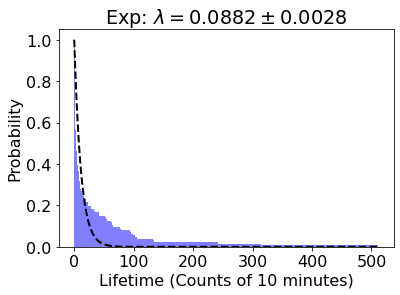

<Figure size 3000x2000 with 0 Axes>

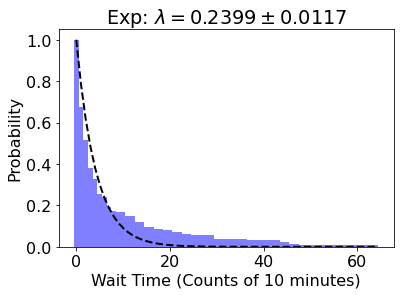

<Figure size 3000x2000 with 0 Axes>

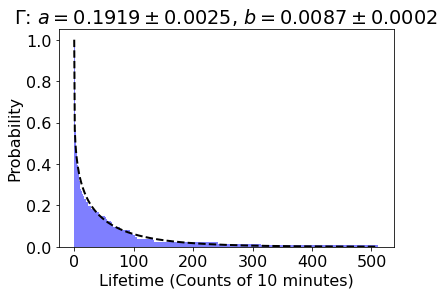

<Figure size 3000x2000 with 0 Axes>

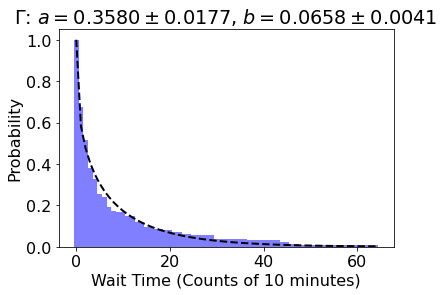

<Figure size 3000x2000 with 0 Axes>

In [7]:
import numpy as np
import scipy.optimize as optimize
import scipy
from scipy.stats import poisson, expon, gamma
colors = ['blue', 'green', 'red', 'grey', 'orange']

def exp_sf(x, a):
    return expon.sf(x, scale=1/a)

def poisson_sf(x, k, mu):
    return poisson.sf(x, k, mu)

def gamma_survival(x, a, b):
    return gamma.sf(x, a, scale=1/b)


def fit_sf(data, fn=exp_sf, p0=[1], cls='Lifetime'):
    ax = plt.subplot()
    ax.set_title(f'{cls} Distribution')
    ax.set_ylabel('Probability')
    ax.set_xlabel(f'{cls} (Counts of 10 minutes)')
    xs = np.arange(0, max(data)+1, 1)
    ax = plt.subplot()
    larger_than = []
    plt.figure(dpi=500)


    for i in xs[:-1]:
        larger_than.append((data > i).sum() / len(data))

    weight = np.array(larger_than)
    
    ax.bar(xs[:-1], weight, width=1, label='data', color=colors[0], alpha=0.5)

    centers = xs[:-1]
    pars, cov = optimize.curve_fit(fn, centers, weight, p0=p0)

    ax.plot(centers, fn(centers, *pars), 'k--',linewidth = 2, label='fit before')
    return ax, pars, cov

ax, pars, cov = fit_sf(life_counts, exp_sf, p0=[1])
ax.set_title(f'Exp: $\lambda={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$')
plt.show()

ax, pars, cov = fit_sf(wait_counts, exp_sf, p0=[1], cls='Wait Time')
ax.set_title(f'Exp: $\lambda={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$')
plt.show()


ax, pars, cov = fit_sf(life_counts, gamma_survival, p0=[1, 1])
ax.set_title(f'$\Gamma$: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$')
plt.show()

ax, pars, cov = fit_sf(wait_counts, gamma_survival, p0=[1, 1], cls='Wait Time')
ax.set_title(f'$\Gamma$: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$')
plt.show()

# ax, pars, cov = fit_sf(life_counts, poisson_sf, p0=[1, 1])
# ax.set_title(f'$Poisson$: $k={pars[0]:.4f}\pm {np.sqrt(cov[0, 0]):.4f}$, $\mu={pars[1]:.4f}\pm {np.sqrt(cov[1, 1]):.4f}$')
# plt.show()

# ax, pars, cov = fit_sf(wait_counts, gamma_survival, p0=[1, 1], cls='Wait Time')
# ax.set_title(f'$Poisson$: $k={pars[0]:.4f}\pm {np.sqrt(cov[0, 0]):.4f}$, $\mu={pars[1]:.4f}\pm {np.sqrt(cov[1, 1]):.4f}$')
# plt.show()

# ax, pars, cov = fit_larger_than(life_counts, chi_square_dist, p0=[.1])
# ax.set_title(f'$Chi^2$: $k={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$')
# plt.show()

# ax, pars, cov = fit_larger_than(life_counts, binormal_dist, p0=[1, 1, 1])
# ax.set_title(f'$BiNormal$: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$, $c={pars[2]:.4f}\pm{np.sqrt(cov[2, 2]):.4f}$')
# plt.show()


# ax, pars, cov = fit_larger_than(life_counts, dirichlet_dist, p0=[.1, 1, .1])
# ax.set_title(f'$Dirichlet$: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$, $c={pars[2]:.4f}\pm{np.sqrt(cov[2, 2]):.4f}$')
# plt.show()

In [5]:


def poisson_arrival(x, a, b):
    return a*np.exp(-b*x)

def exp_dist(x, a):
    return a*np.exp(-a*x)

def mono_exp(x, a, b):
    return a*np.exp(-b*x)

def hyperbolic(x, a, b, c):
    return a/(1+b*x)+c

def half_normal(x, a, b):
    return a*np.exp(-b*x**2)

def gamma_dist(x, a, b):
    return gamma.pdf(x, a, scale=1/b)

def erlang_dist(x, l, k):
    return l**k*x**(k-1)*np.exp(-l*x)/scipy.special.gamma(k)

def chi_square_dist(x, k):
    return x**(k/2-1)*np.exp(-x/2)/2**(k/2)/scipy.special.gamma(k/2)

def binormal_dist(x, a, b, c):
    return a*np.exp(-b*x-c*x**2)

def dirichlet_dist(x, a, b, c):
    return a*x**(a-1)*(1-x)**(b-1)*np.exp(-c*x)/(scipy.special.beta(a,b)*scipy.special.gamma(c))

def fit(data, fn=exp_dist, p0=[1], cls='Lifetime', ax=None):
    if ax is None:
        ax = plt.subplot()
    ax.set_title(f'{cls} Distribution')
    ax.set_ylabel('Density')
    ax.set_xlabel(f'{cls} (Counts of 10 minutes)')
    binwidth = 1
    bins = np.arange(min(data), max(data) + binwidth, binwidth)
    n, bins, patches = ax.hist(data, bins=bins, density=True, facecolor = colors[0], alpha = 0.5, label='before')
    centers = (0.5*(bins[1:]+bins[:-1]))
    pars, cov = optimize.curve_fit(fn, centers, n, p0=p0)

    ax.plot(centers, fn(centers, *pars), 'k--',linewidth = 2, label='fit before')
    return ax, pars, cov


FitParams(loc=0.13067824861049715, scale=13.62964494677179)


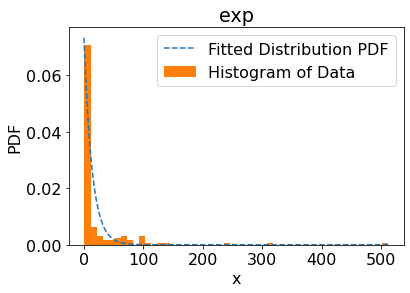

FitParams(a=0.16236498713129763, loc=0.8799680511000149, scale=206.76180319239765)


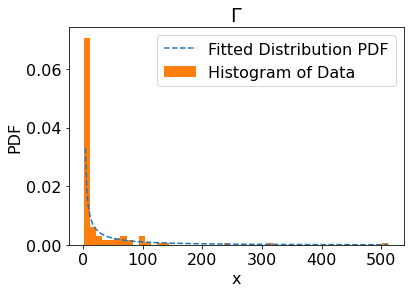

In [20]:
from scipy import stats
def fit(data, fn=exp_dist, p0=[(0, 1), (0, 1)], cls='Lifetime', ax=None):
    if ax is None:
        ax = plt.subplot()
    ax.set_title(f'{cls} Distribution')
    ax.set_ylabel('Density')
    ax.set_xlabel(f'{cls} (Counts of 10 minutes)')
    # binwidth = 1
    # bins = np.arange(min(data), max(data) + binwidth, binwidth)
    # n, bins, patches = ax.hist(data, bins=bins, density=True, facecolor = colors[0], alpha = 0.5, label='before')

    model = stats.fit(fn, data, bounds=p0, method='mse')

    model.plot(ax=ax)
    return ax, model.params

# ax, pars, cov = fit(life_hours, fn=poisson_arrival, p0=[.1, .1], cls='Lifetime')
# ax.set_title(f'Poission: $\lambda={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$')
# plt.show()

# fig, axes = plt.subplots(nrows=4, ncols=2)
# ax = axes[0, 0]
ax, pars = fit(life_counts, stats.expon, p0=[(0, 10), (0, 100)])
print(pars)
ax.set_title(f'exp')
plt.show()

# ax = axes[0, 1]
# ax, pars, cov = fit(life_counts, mono_exp, p0=[1, 0])
# ax.set_title(f'monoExp: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$')
# plt.show()

# ax = axes[1, 0]
# ax, pars, cov = fit(life_counts, hyperbolic, p0=[1, 1, -1], ax=ax)
# ax.set_title(f'Hyerbolic: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$')

# ax = axes[1, 0]
# ax, pars, cov = fit(life_counts, half_normal, p0=[.1, .1])
# ax.set_title(f'half norm: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$')

# ax = axes[1, 1]
ax, pars = fit(life_counts, stats.gamma, p0=[(0,1), (0,100), (0, 10000)])
print(pars)
ax.set_title(f'$\Gamma$')

# ax = axes[2, 0]
# ax, pars, cov = fit(life_counts, chi_square_dist, p0=[.1])
# ax.set_title(f'$Chi^2$: $k={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$')

# ax = axes[2, 1]
# ax, pars, cov = fit(life_counts, binormal_dist, p0=[1, 1, 1])
# ax.set_title(f'$BiNormal$: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$, $c={pars[2]:.4f}\pm{np.sqrt(cov[2, 2]):.4f}$')

# ax = axes[2, 2]
# ax, pars, cov = fit(life_counts, dirichlet_dist, p0=[.1, 1, .1])
# ax.set_title(f'$Dirichlet$: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$, $c={pars[2]:.4f}\pm{np.sqrt(cov[2, 2]):.4f}$')
plt.show()

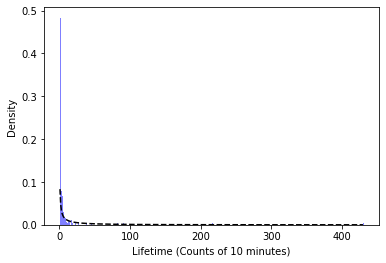

In [140]:
ax = plt.subplot()
data = life_counts
xs = np.arange(0, max(data)+1, 1)
binwidth = 1
n, bins, patches = ax.hist(data, bins=xs, density=True, facecolor = colors[0], alpha = 0.5, label='before')
ax.plot(xs[:-1], gamma.pdf(xs[:-1], a=0.1919, scale=1/0.0087), 'k--', label='fit')
ax.set_ylabel('Density')
ax.set_xlabel('Lifetime (Counts of 10 minutes)')
plt.show()

/Users/zhwu/miniconda3/envs/sky-dev/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


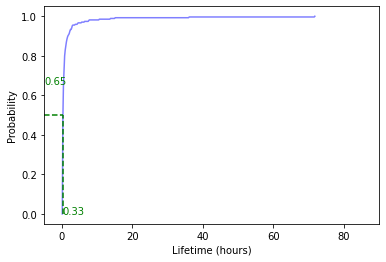

In [141]:
import numpy as np
from matplotlib import pyplot as plt

ax = plt.subplot()
binwidth = 1/6
bins = np.arange(0, max(life_hours) + binwidth, binwidth)
count, bins_count = np.histogram(life_hours, bins=bins)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
ax.plot(bins_count[1:], cdf, label="CDF", color=colors[0], alpha=0.5)
v_index = np.where(cdf == cdf[cdf>0.5][0])[0]
ax.plot([bins_count[v_index], bins_count[v_index]], [0, 0.5], color=colors[1], linestyle='--')
ax.plot([-5, bins_count[v_index]], [0.5, 0.5], color=colors[1], linestyle='--')
ax.annotate(f'{bins_count[v_index][0]:.2f}', (bins_count[v_index][0], 0), color=colors[1])
ax.annotate(f'{cdf[v_index][0]:.2f}', (-5, cdf[v_index][0]), color=colors[1])
ax.set_xlabel('Lifetime (hours)')
ax.set_ylabel('Probability')
ax.set_xlim(-5, 90)
# plt.legend()
plt.show()

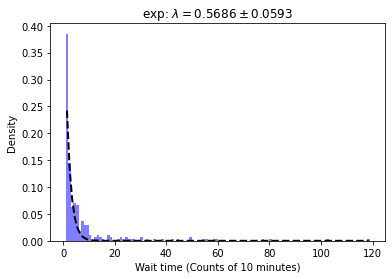

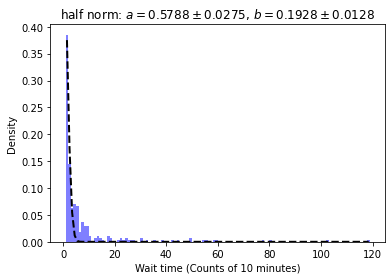

In [142]:
wait_groups = (1-avail_traces_month['preempted']).cumsum()
wait_counts = wait_groups.groupby(wait_groups).count() - 1
wait_hours = wait_counts[wait_counts > 0] * 600 / 3600
wait_counts = wait_counts[wait_counts > 0]
ax = plt.subplot()
ax.set_title('Wait Time Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Wait Time (Counts of 10 minutes)')



ax, pars, cov = fit(wait_counts, cls='Wait time')
ax.set_title(f'exp: $\lambda={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$')
plt.show()

# ax, pars, cov = fit(wait_counts, mono_exp, p0=[1, 0], cls='Wait time')
# ax.set_title(f'monoExp: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$')
# plt.show()

# ax, pars, cov = fit(wait_counts, hyperbolic, p0=[1, 1, -1], cls='Wait time')
# ax.set_title(f'Hyerbolic: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$')
# plt.show()

ax, pars, cov = fit(wait_counts, half_normal, p0=[.1, .1], cls='Wait time')
ax.set_title(f'half norm: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$')
plt.show()

# ax, pars, cov = fit(wait_counts, gamma_dist, p0=[1, 1], cls='Wait time')
# ax.set_title(f'$\Gamma$: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$')
# plt.show()

# ax, pars, cov = fit(wait_counts, chi_square_dist, p0=[.1], cls='Wait time')
# ax.set_title(f'$Chi^2$: $k={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$')
# plt.show()

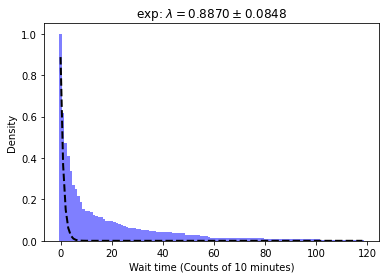

<Figure size 3000x2000 with 0 Axes>

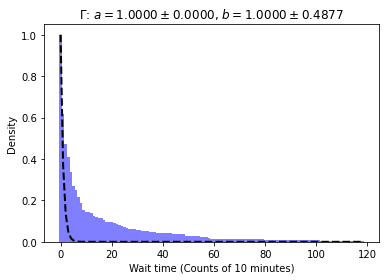

<Figure size 3000x2000 with 0 Axes>

In [143]:
ax, pars, cov = fit_larger_than(wait_counts, cls='Wait time')
ax.set_title(f'exp: $\lambda={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$')
plt.show()

# ax, pars, cov = fit_larger_than(wait_counts, mono_exp, p0=[1, 0])
# ax.set_title(f'monoExp: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$')
# plt.show()

# ax, pars, cov = fit_larger_than(wait_counts, hyperbolic, p0=[1, 1, -1])
# ax.set_title(f'Hyerbolic: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$')
# plt.show()

# ax, pars, cov = fit_larger_than(wait_counts, half_normal, p0=[.1, .1], cls='Wait time')
# ax.set_title(f'half norm: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$')
# plt.show()

ax, pars, cov = fit_larger_than(wait_counts, gamma_dist, p0=[1, 1], cls='Wait time')
ax.set_title(f'$\Gamma$: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$')
plt.show()

# ax, pars, cov = fit_larger_than(wait_counts, chi_square_dist, p0=[.1], cls='Wait time')
# ax.set_title(f'$Chi^2$: $k={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$')
# plt.show()

# ax, pars, cov = fit_larger_than(wait_counts, binormal_dist, p0=[1, 1, 1], cls='Wait time')
# ax.set_title(f'$BiNormal$: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$, $c={pars[2]:.4f}\pm{np.sqrt(cov[2, 2]):.4f}$')
# plt.show()


# ax, pars, cov = fit_larger_than(wait_counts, dirichlet_dist, p0=[.1, 1, .1])
# ax.set_title(f'$Dirichlet$: $a={pars[0]:.4f}\pm{np.sqrt(cov[0, 0]):.4f}$, $b={pars[1]:.4f}\pm{np.sqrt(cov[1, 1]):.4f}$, $c={pars[2]:.4f}\pm{np.sqrt(cov[2, 2]):.4f}$')
# plt.show()

[(0, 1.0), (1, 0.14869888475836432), (2, 0.08550185873605948), (3, 0.04460966542750929), (4, 0.040892193308550186), (5, 0.03345724907063197), (6, 0.02973977695167286), (7, 0.026022304832713755), (8, 0.01858736059479554), (9, 0.01858736059479554), (10, 0.01858736059479554), (11, 0.01486988847583643), (12, 0.01486988847583643), (13, 0.01486988847583643), (14, 0.011152416356877323), (15, 0.007434944237918215), (16, 0.007434944237918215), (17, 0.007434944237918215), (18, 0.007434944237918215), (19, 0.007434944237918215), (20, 0.007434944237918215), (21, 0.007434944237918215), (22, 0.007434944237918215), (23, 0.007434944237918215), (24, 0.007434944237918215), (25, 0.007434944237918215), (26, 0.007434944237918215), (27, 0.007434944237918215), (28, 0.007434944237918215), (29, 0.007434944237918215), (30, 0.007434944237918215), (31, 0.007434944237918215), (32, 0.007434944237918215), (33, 0.007434944237918215), (34, 0.007434944237918215), (35, 0.007434944237918215), (36, 0.0037174721189591076), 

/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_49387/2145843975.py:17: RuntimeWarning: overflow encountered in exp
  return m * np.exp(-t * x) + b


<AxesSubplot: xlabel='Lifetime (Hours)', ylabel='Rate'>

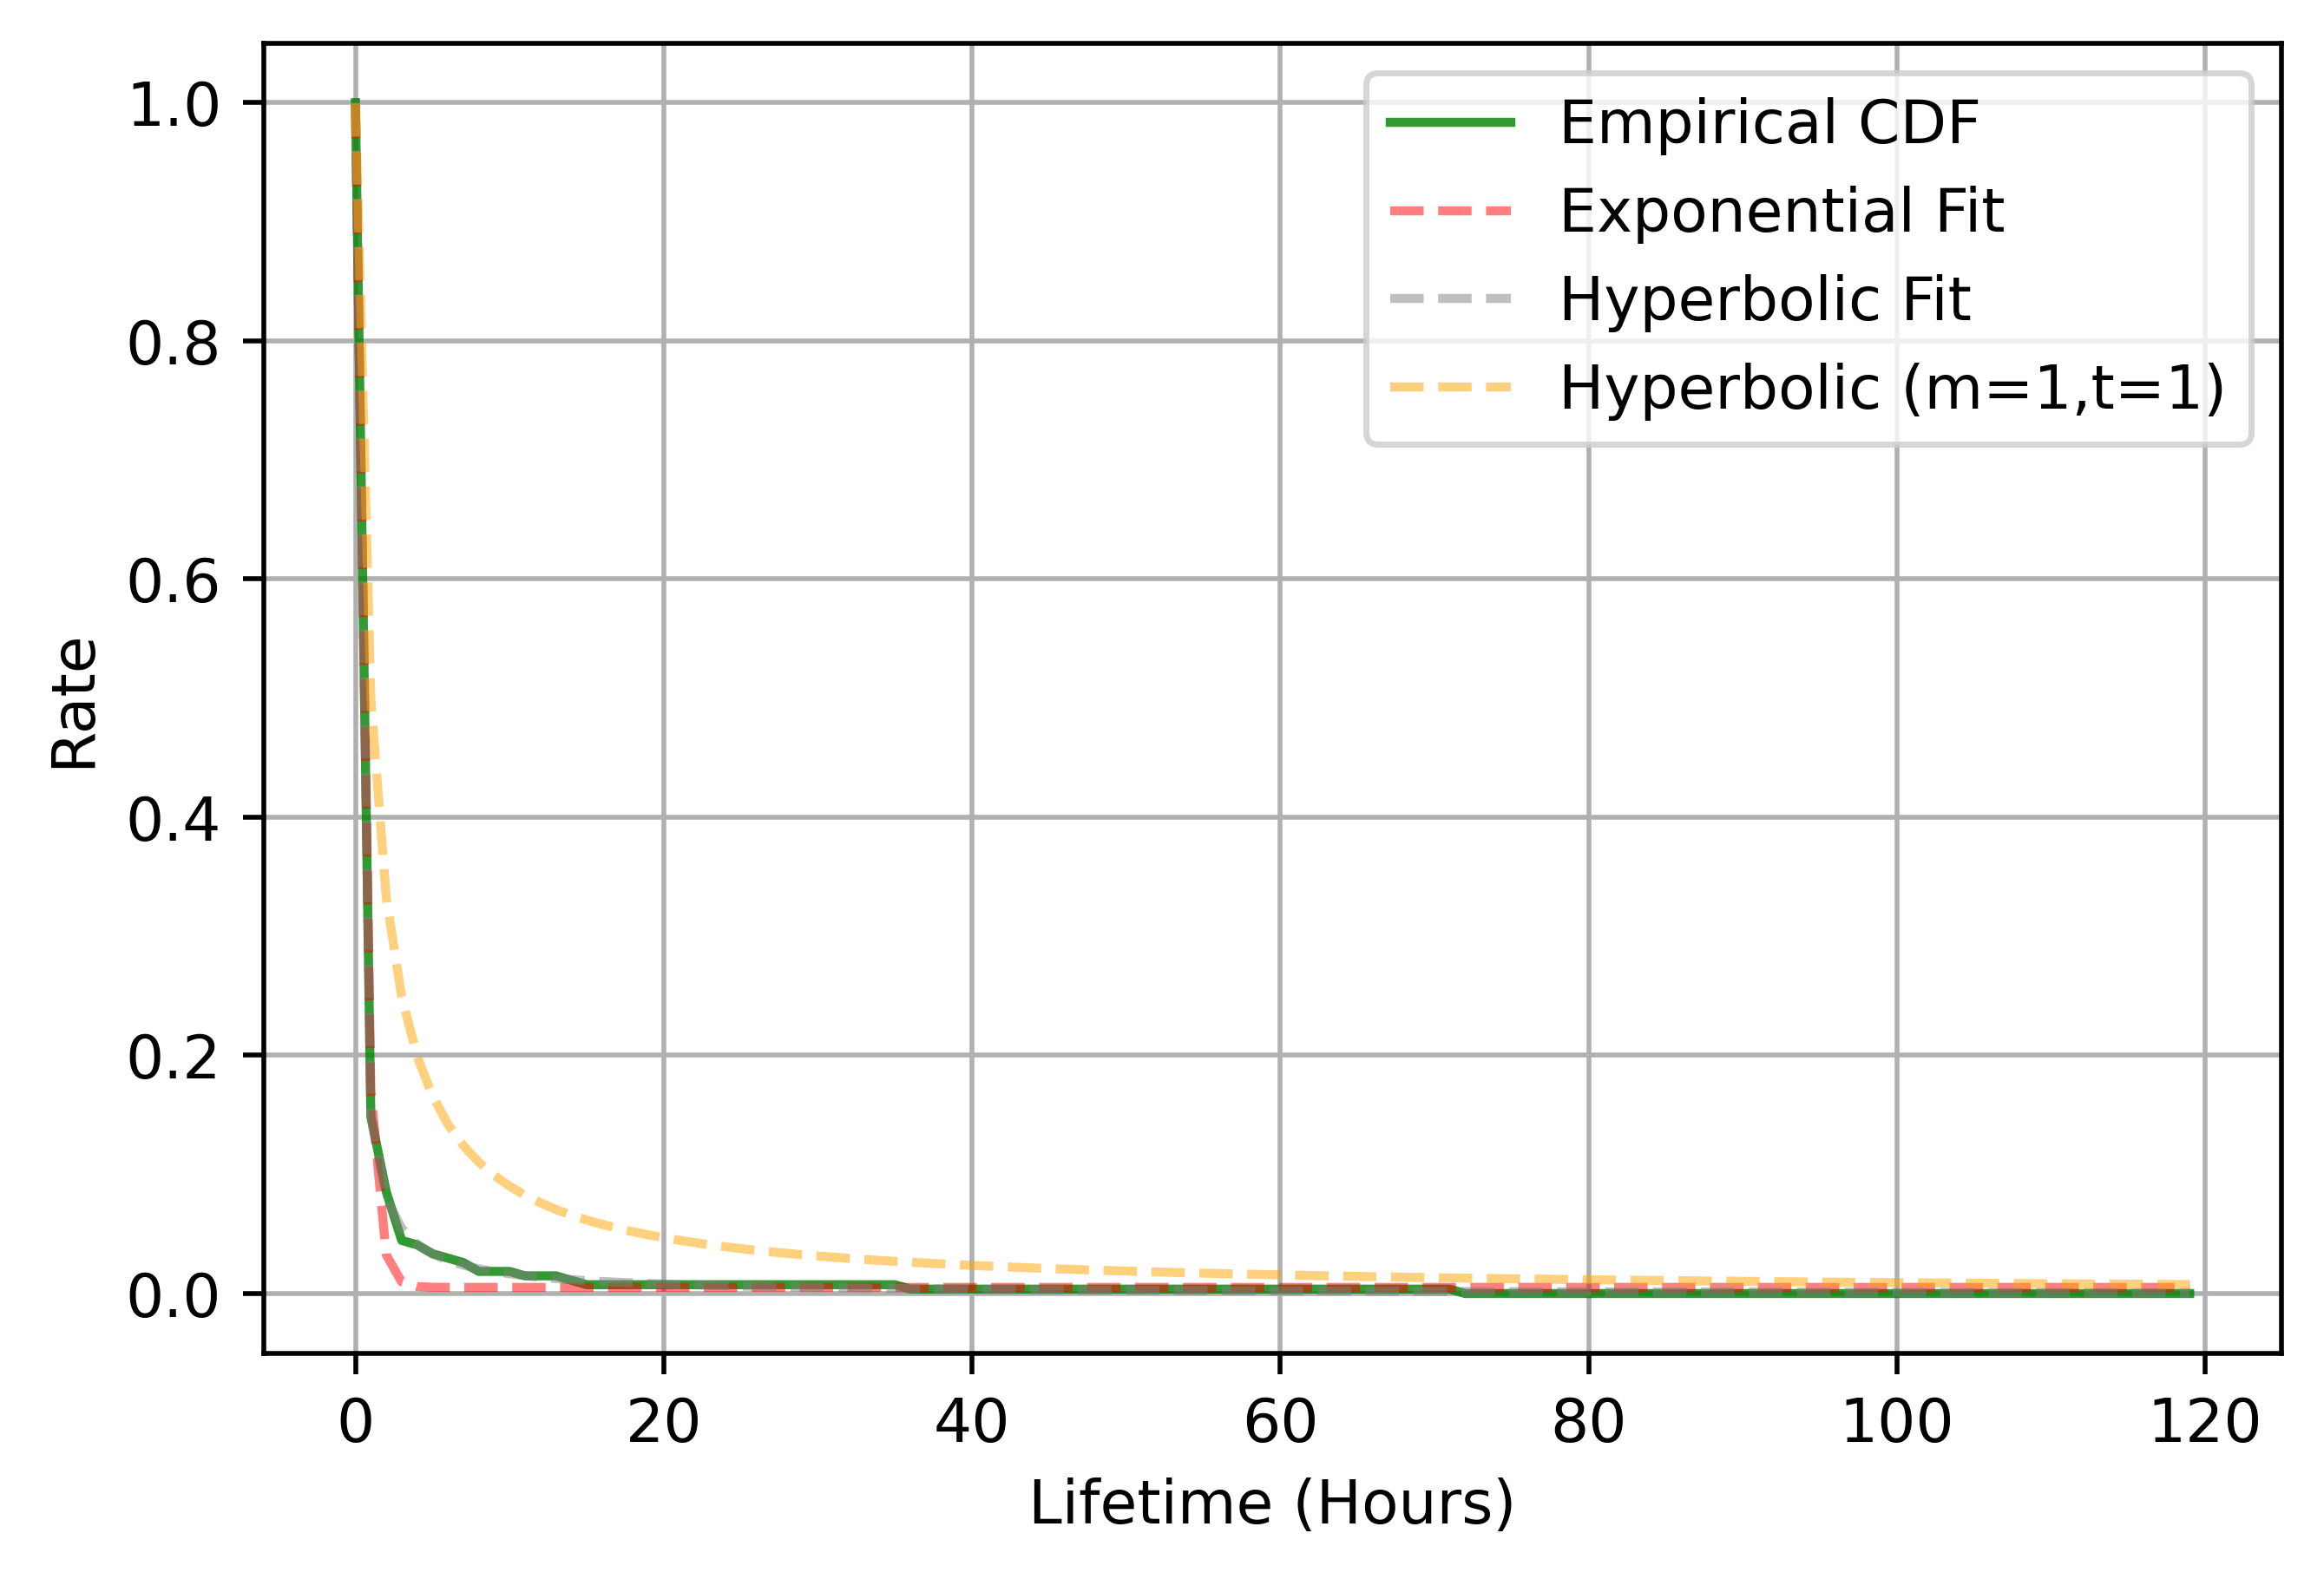

In [144]:
xs = np.arange(0, 120, 1)
larger_than = []
plt.figure(dpi=500)

for i in xs:
    larger_than.append((life_hours > i).sum() / len(life_hours))
print(list(zip(xs, larger_than)))
larger_than = np.array(larger_than)

sns.lineplot(x=xs, y=larger_than, color=colors[1], alpha=0.8, label='Empirical CDF')
plt.grid(True)

plt.xlabel('Lifetime (Hours)')
plt.ylabel('Rate')

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b
a = 1/(1-np.exp(-80))
p0 = (.1, 1, -.1) # start with values near those we expect
params, cv = optimize.curve_fit(monoExp, xs, larger_than, p0)
m, t, b = params
print(m, t, b)
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate
sns.lineplot(x=xs, y=monoExp(xs, m, t, b), color=colors[2], alpha=0.5, linestyle='--', label='Exponential Fit')

def hyperbolic(x, m, t, b):
    return m / (1 + t * x) + b
p0 = (1, 1, -1) # start with values near those we expect
params, cv = optimize.curve_fit(hyperbolic, xs, larger_than, p0)
m, t, b = params
print(m, t, b)
sns.lineplot(x=xs, y=hyperbolic(xs, m, t, b), color=colors[3], alpha=0.5, linestyle='--', label='Hyperbolic Fit')
m, t = 1,1
sns.lineplot(x=xs, y=hyperbolic(xs, m, t, b), color=colors[4], alpha=0.5, linestyle='--', label='Hyperbolic (m=1,t=1)')


# sns.lineplot(x=xs, y=halfnorm(xs, loc, scale), color=colors[0], alpha=0.5, linestyle='--', label='Half Normal Fit')

3895
0.6541720154043618
0.6962772785622563
0.3625160462130923
0.36765083440307944


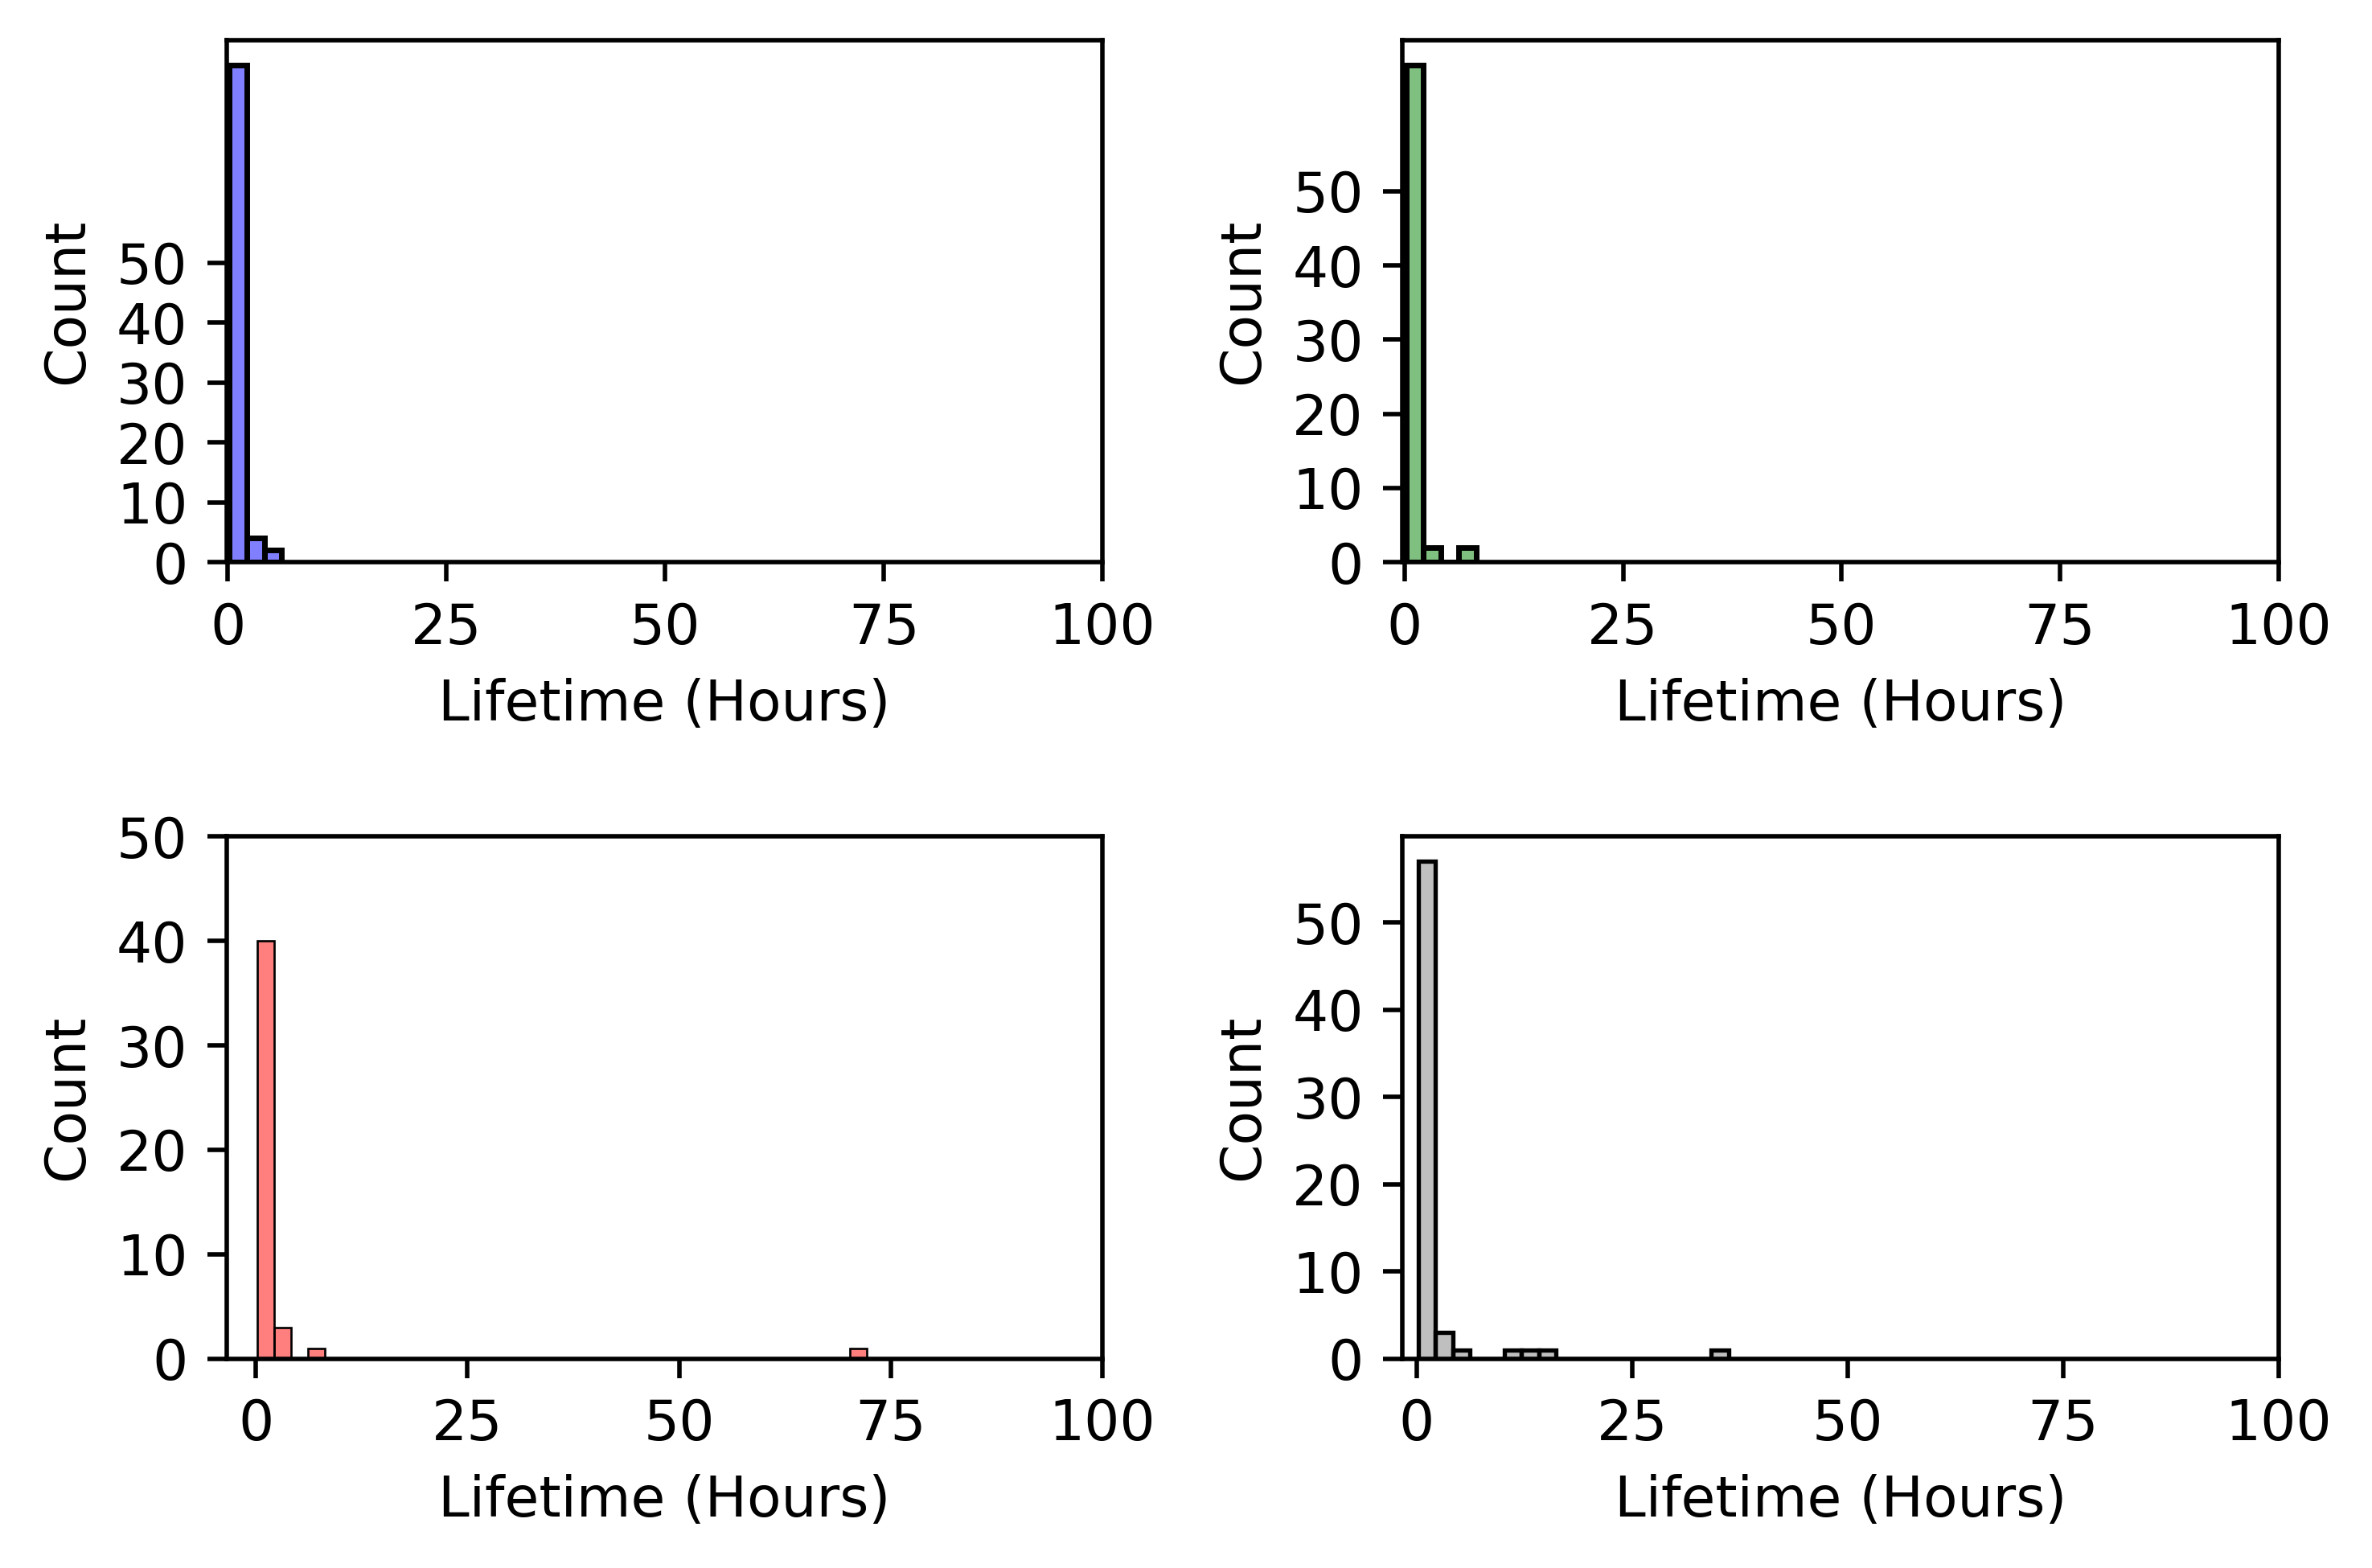

In [145]:
colors = ['blue', 'green', 'red', 'grey', 'orange']
plt.rc('font', size=10)
l = len(avail_traces_month)
print(l)
groups = 4
fig, axes = plt.subplots(nrows=groups // 2, ncols=2, dpi=500)
for i in range(groups):
    print(sum(avail_traces_month['preempted'].iloc[int(i/groups*l):int((i+1)/groups*l)] / l * groups))
    life_groups = avail_traces_month['preempted'].iloc[int(i/groups*l):int((i+1)/groups*l)].cumsum()
    lifetimes = life_groups.groupby(life_groups).count() - 1
    life_hours = lifetimes[lifetimes > 0] * 600 / 3600
    
    ax = axes[i//2][i%2]
    sns.histplot(life_hours, binwidth=2, ax=ax, label=f'Batch {i+1}', color=colors[i%5], alpha=0.5, stat='count')
    ax.set_ylabel('Count')
    ax.set_yticks(list(range(0, 51, 10)))
    ax.set_xlabel('Lifetime (Hours)')
    ax.set_xticks(list(range(0, 101, 25)))
# fig.set_title('Lifetime Distribution')
fig.tight_layout(h_pad=1.5)
plt.show()

Text(0.5, 1.0, 'Time slice alive Distribution (time slice = 4 hours)')

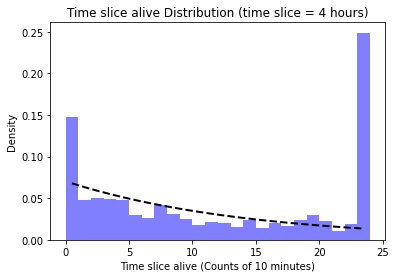

In [146]:
avail_trace = 1-avail_traces_month['preempted']
TIME_SLICE = 4
time_slice_alive_hours = avail_trace.rolling(TIME_SLICE * 6).sum()
time_slice_alive_hours = time_slice_alive_hours[~time_slice_alive_hours.isna()]

ax, pars, cov = fit(time_slice_alive_hours, fn=exp_dist, p0=[1], cls='Time slice alive')
ax.set_title(f'Time slice alive Distribution (time slice = {TIME_SLICE} hours)')

## Visualize generated traces

4320


[Text(0, 0, 'Unavailable'), Text(0, 1, 'Available')]

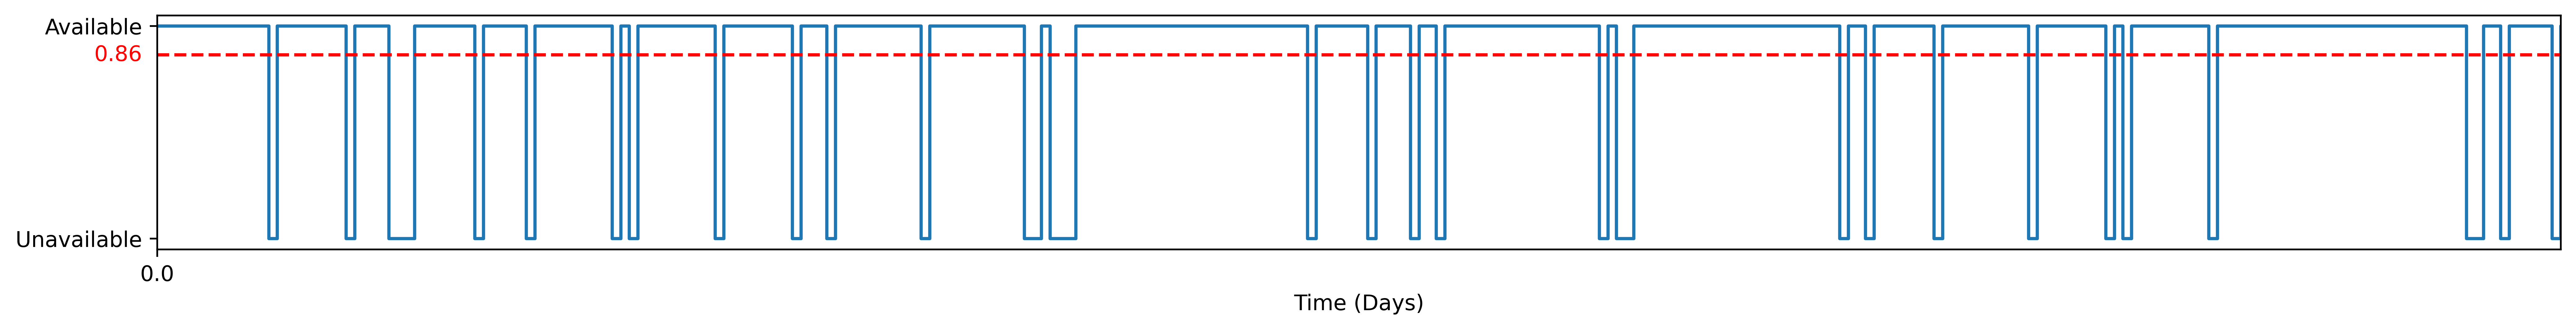

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import pathlib
import json
import seaborn as sns
# TRACE = '../../data/two_exp/gap_600-alive_0.4202000000080931-wait_0.2366999999982129/0.json'
# TRACE = '../../data/two_gamma/gap_600-alive_0.1919_0.008700000000002435-wait_0.358_0.06579999999981707/2.json'
# TRACE = '../../data/two_exp/gap_600-alive_0.02-wait_0.02/0.json'
# TRACE = '../../data/two_exp/gap_600-alive_0.04082965866405357-wait_0.1559405943681992/0.json'
TRACE = '../../data/poisson/gap_600-hourly_rate_0.6/10.json'
# TRACE = '../../data/two_exp/gap_600-preemption_rate_0.2/0.json'
# TRACE = '../../data/real/ping_based/random_start_time/us-west-2a_v100_1/0.json'
# TRACE = 'traces/2022-10-26T22-05/us-west-2a_v100_1.txt'
# TRACE = 'traces/2022-10-26T22-05/us-west-2b_v100_1.txt'
# TRACE = 'traces/2022-10-26T22-05/us-west-2a_k80_1.txt'
# TRACE = 'traces/2022-10-26T22-05/us-west-2b_k80_1.txt'

trace_path = pathlib.Path(TRACE).expanduser().absolute()
avail_traces_month = {}
avail_traces_month = np.array(json.load(trace_path.open('r'))['data'])
print(len(avail_traces_month))


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 2), dpi=500)
xs = np.arange(len(avail_traces_month))
sns.lineplot(x=xs, y=1-avail_traces_month, drawstyle='steps-post', ax=ax)
ax.set_xticks(np.arange(0, len(avail_traces_month), 720))
ax.set_xticklabels(np.arange(0, len(avail_traces_month), 720) * 600 / 3600 / 24)
ax.set_xlim(0, 280)
ax.set_xlabel('Time (Days)')

mean = (1 - avail_traces_month).mean()
sns.lineplot(x=xs, y=mean, color='red', linestyle='--', ax=ax)
trans = transforms.blended_transform_factory(
ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0, mean, "{:.2f}".format(mean), color="red", transform=trans, 
    ha="right", va="center")

ax.set_yticks([0, 1])
ax.set_yticklabels(['Unavailable', 'Available'])
# ax.set_ylabel('')
# l = len(avail_traces_month['time'])
# groups = 4
# for i in range(1, groups):
#     plt.axvline(pd.to_datetime(avail_traces_month['time'].iloc[l*i//4]), color='red', linestyle='--', linewidth=4)